In [0]:
## Objetivos

O objetivo deste trabalho é produzir uma análise detalhada sobre o comportamento dos preços dos combustíveis no Brasil. Para garantir uma visão mais ampla e evitar distorções causadas por variações momentâneas, foi escolhido um período extenso de observação: de 2014 até 2024. Esse recorte temporal permite avaliar, por exemplo, o impacto da pandemia da COVID-19 nos preços dos combustíveis e identificar tendências de longo prazo.

As principais perguntas que nortearam a análise foram:

Como evoluíram os preços dos combustíveis ao longo dos anos?

Existe muita variação de preços entre estados e postos?

Quais estados apresentam os preços médios mais altos ou mais baixos?

Qual bandeira tende a ter os menores preços?

Qual é a relação histórica entre os preços do etanol e da gasolina?

Existe alguma tendência sazonal nos preços (por mês ou semestre)?

Os anos eleitorais influenciam os preços dos combustíveis?


In [0]:
## Origem dos dados

Os arquivos foram obtidos manualmente, respeitando a organização semestral publicada pela ANP.
https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis

Os arquivos foram obtidos manualmente, respeitando a organização semestral publicada pela ANP. Para facilitar a automatização do carregamento e o controle da base no ambiente Databricks, os arquivos foram renomeados no seguinte padrão:
    Ano-Semestre.csv

Essa renomeação simples viabilizou a iteração em loop na coleta dos dados dentro do notebook, contribuindo para uma estrutura de pipeline mais eficiente.



In [0]:
1. Coleta e Importação dos Dados
Carregamento dos arquivos CSV semestrais de 2014 a 2024, leitura em DataFrames e concatenação em uma base unificada.

2. Limpeza e Transformação
Conversão de datas, padronização de valores, criação de colunas auxiliares (ano, mês, semestre).

3. Análise de Qualidade dos Dados
Detecção de nulos, outliers, remoção de produtos irrelevantes (ex: ETANO).

4. Evolução dos Preços por Ano e Produto
Gráfico de linha mostrando como os preços variaram ao longo da década para cada combustível.

5. Diferença e Variação dos Preços dos Combustíveis
Análise da dispersão de preços de cada produto analisando a dispersão dos valores

6. Diferença de Preços entre Estados
Tabela com os estados que apresentaram os menores e maiores preços médios por produto e por ano.

7. Comparação de Preços entre as Bandeiras
Média e desvio padrão de preços por distribuidora (bandeira) para cada combustível. Identificação das mais baratas e caras.

8. Relação Etanol / Gasolina ao Longo dos Anos
Gráfico mostrando a proporção entre os preços médios de etanol e gasolina, comparando com a linha de 70%.

9. Tendência Sazonal dos Preços
Visualização da variação média mensal dos combustíveis. Verificação de sazonalidade.

10. Efeito das Eleições na Variação de Preço
Comparação entre anos eleitorais e não-eleitorais para o segundo semestre. Tabela com diferenças médias.


In [0]:
## 1. Coleta e Importação dos Dados

import pandas as pd

# Ajustei o nome das planilhas para que seguissem o padrão Ano-Semestre, indo de 2014 até 2024

anos = list(range(2014, 2025))
semestral = ["01", "02"]

arquivos = [
    f"/Volumes/main/default/mvp/{ano}-{sem}.csv"
    for ano in anos
    for sem in semestral
]

dfs = []
for caminho in arquivos:
    try:
        df = pd.read_csv(caminho, sep=';', encoding='latin1', low_memory=False)
        df["arquivo_origem"] = caminho.split("/")[-1].replace(".csv", "")
        dfs.append(df)

        print(f"✅ Carregado com sucesso: {caminho}")
    except Exception as e:
        print(f"❌ Erro ao carregar: {caminho} | Erro: {e}")

df_combustivel = pd.concat(dfs, ignore_index=True)

display(df_combustivel.head())


✅ Carregado com sucesso: /Volumes/main/default/mvp/2014-01.csv
✅ Carregado com sucesso: /Volumes/main/default/mvp/2014-02.csv
✅ Carregado com sucesso: /Volumes/main/default/mvp/2015-01.csv
✅ Carregado com sucesso: /Volumes/main/default/mvp/2015-02.csv
✅ Carregado com sucesso: /Volumes/main/default/mvp/2016-01.csv
✅ Carregado com sucesso: /Volumes/main/default/mvp/2016-02.csv
✅ Carregado com sucesso: /Volumes/main/default/mvp/2017-01.csv
✅ Carregado com sucesso: /Volumes/main/default/mvp/2017-02.csv
✅ Carregado com sucesso: /Volumes/main/default/mvp/2018-01.csv
✅ Carregado com sucesso: /Volumes/main/default/mvp/2018-02.csv
✅ Carregado com sucesso: /Volumes/main/default/mvp/2019-01.csv
✅ Carregado com sucesso: /Volumes/main/default/mvp/2019-02.csv
✅ Carregado com sucesso: /Volumes/main/default/mvp/2020-01.csv
✅ Carregado com sucesso: /Volumes/main/default/mvp/2020-02.csv
✅ Carregado com sucesso: /Volumes/main/default/mvp/2021-01.csv
✅ Carregado com sucesso: /Volumes/main/default/mvp/2021

ï»¿Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,arquivo_origem,Regiao - Sigla
SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,02/01/2014,"2,899",null,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,2014-01,null
SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,02/01/2014,"1,949",null,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,2014-01,null
SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL,02/01/2014,"2,399",null,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,2014-01,null
SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL S10,02/01/2014,"2,569",null,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,2014-01,null
SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GNV,02/01/2014,"1,599",null,R$ / mÂ³,PETROBRAS DISTRIBUIDORA S.A.,2014-01,null


In [0]:
## 2. Limpeza e Transformação

df_combustivel["Data da Coleta"] = pd.to_datetime(
    df_combustivel["Data da Coleta"], 
    format="%d/%m/%Y", 
    errors="coerce"
)

df_combustivel["Valor de Venda"] = (
    df_combustivel["Valor de Venda"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .astype(float)
)

colunas_uteis = [
    'ï»¿Regiao - Sigla',
    'Estado - Sigla',
    'Municipio',
    'Produto',
    'Valor de Venda',
    'Bandeira',
    'Data da Coleta',
    'arquivo_origem'
]
df_limpo = df_combustivel[colunas_uteis].copy()

display(df_limpo.head())


ï»¿Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Bandeira,Data da Coleta,arquivo_origem
SE,SP,GUARULHOS,GASOLINA,2.899,PETROBRAS DISTRIBUIDORA S.A.,2014-01-02T00:00:00.000Z,2014-01
SE,SP,GUARULHOS,ETANOL,1.949,PETROBRAS DISTRIBUIDORA S.A.,2014-01-02T00:00:00.000Z,2014-01
SE,SP,GUARULHOS,DIESEL,2.399,PETROBRAS DISTRIBUIDORA S.A.,2014-01-02T00:00:00.000Z,2014-01
SE,SP,GUARULHOS,DIESEL S10,2.569,PETROBRAS DISTRIBUIDORA S.A.,2014-01-02T00:00:00.000Z,2014-01
SE,SP,GUARULHOS,GNV,1.599,PETROBRAS DISTRIBUIDORA S.A.,2014-01-02T00:00:00.000Z,2014-01


In [0]:
## 3. Análise de Qualidade dos Dados

print("Valores nulos por coluna:")
print(df_limpo.isnull().sum())

print("\nIntervalo de datas:")
print(df_limpo["Data da Coleta"].min(), "→", df_limpo["Data da Coleta"].max())

print("\nTipos de combustível encontrados:")
print(df_limpo["Produto"].unique())

print("\nEstatísticas do Valor de Venda:")
print(df_limpo["Valor de Venda"].describe())

df_preco_estranho = df_limpo[(df_limpo["Valor de Venda"] < 1) | (df_limpo["Valor de Venda"] > 20)]

produtos_excluir = ["ETANO"]
df_limpo = df_limpo[~df_limpo["Produto"].str.upper().isin(produtos_excluir)]


print(f"\n⚠️ Registros com preços suspeitos: {df_preco_estranho.shape[0]}")
if not df_preco_estranho.empty:
    display(df_preco_estranho)
else:
    print("✅ Nenhum registro com preço fora da faixa esperada (1 a 20).")


Valores nulos por coluna:
ï»¿Regiao - Sigla    472856
Estado - Sigla            0
Municipio                 0
Produto                   0
Valor de Venda            1
Bandeira                  1
Data da Coleta            1
arquivo_origem            0
dtype: int64

Intervalo de datas:
2014-01-01 00:00:00 → 2024-12-31 00:00:00

Tipos de combustível encontrados:
['GASOLINA' 'ETANOL' 'DIESEL' 'DIESEL S10' 'GNV' 'ETANO'
 'GASOLINA ADITIVADA']

Estatísticas do Valor de Venda:
count    1.027284e+07
mean     4.041774e+00
std      1.366383e+00
min      1.339000e+00
25%      2.999000e+00
50%      3.660000e+00
75%      4.990000e+00
max      9.790000e+00
Name: Valor de Venda, dtype: float64

⚠️ Registros com preços suspeitos: 0
✅ Nenhum registro com preço fora da faixa esperada (1 a 20).


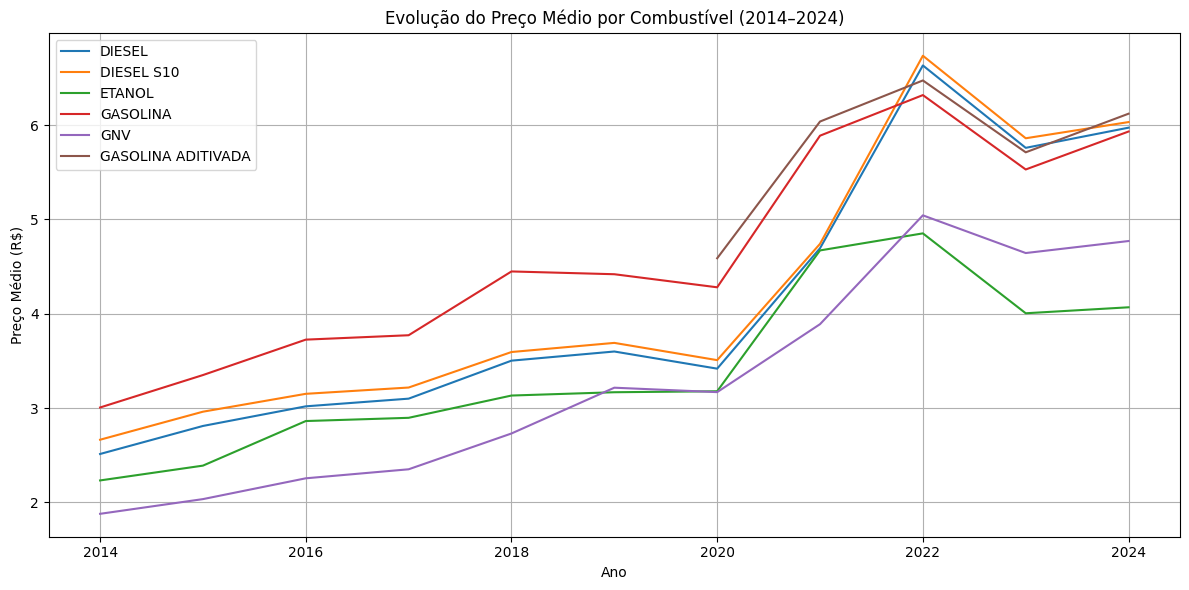

In [0]:
## 4. Evolução dos Preços por Ano e Produto

import matplotlib.pyplot as plt

# 📅 Criar uma coluna com o ano
df_limpo["Ano"] = df_limpo["Data da Coleta"].dt.year

# 📊 Agrupar por ano e produto (combustível) e calcular a média
df_media_ano = df_limpo.groupby(["Ano", "Produto"])["Valor de Venda"].mean().reset_index()

# 🎨 Plotar gráfico de linha
plt.figure(figsize=(12, 6))
for produto in df_media_ano["Produto"].unique():
    dados = df_media_ano[df_media_ano["Produto"] == produto]
    plt.plot(dados["Ano"], dados["Valor de Venda"], label=produto)

plt.title("Evolução do Preço Médio por Combustível (2014–2024)")
plt.xlabel("Ano")
plt.ylabel("Preço Médio (R$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [0]:
## 5. Diferença e variação de Preços dos Combustíveis

df_variacao = df_limpo.groupby("Produto")["Valor de Venda"].agg(
    preco_min="min",
    preco_max="max",
    media="mean",
    desvio_padrao="std"
).reset_index()

# Criar uma coluna com a variação absoluta e relativa
df_variacao["variacao_absoluta"] = df_variacao["preco_max"] - df_variacao["preco_min"]
df_variacao["variacao_percentual"] = (df_variacao["variacao_absoluta"] / df_variacao["media"]) * 100

df_variacao = df_variacao.sort_values("variacao_absoluta", ascending=False)
display(df_variacao)


Produto,preco_min,preco_max,media,desvio_padrao,variacao_absoluta,variacao_percentual
DIESEL S10,2.099,9.65,4.121124134109303,1.362252558066965,7.551,183.22670597332043
DIESEL,2.099,8.999,3.720993231061684,1.3104850616505037,6.9,185.4343604390614
GNV,1.339,7.99,3.2540972058917843,1.2205761394404113,6.651,204.38848562845234
GASOLINA,2.35,8.99,4.436903406491645,1.168045476225024,6.640000000000001,149.65392283016573
ETANOL,1.39,7.98,3.2580970844008705,0.9674556599888692,6.590000000000001,202.2653048477784
GASOLINA ADITIVADA,3.457,9.79,6.049327963982704,0.7489803901236892,6.332999999999999,104.6893148744168


In [0]:
## 6. Diferença de Preço entre Estados

df_limpo["Ano"] = df_limpo["Data da Coleta"].dt.year

df_agrupado = df_limpo.groupby(["Ano", "Produto", "Estado - Sigla"])["Valor de Venda"].mean().reset_index()

minimos = df_agrupado.loc[df_agrupado.groupby(["Ano", "Produto"])["Valor de Venda"].idxmin()].copy()
minimos.rename(columns={
    "Valor de Venda": "Preço Mínimo",
    "Estado - Sigla": "Estado Mínimo"
}, inplace=True)

maximos = df_agrupado.loc[df_agrupado.groupby(["Ano", "Produto"])["Valor de Venda"].idxmax()].copy()
maximos.rename(columns={
    "Valor de Venda": "Preço Máximo",
    "Estado - Sigla": "Estado Máximo"
}, inplace=True)

df_extremos = pd.merge(
    minimos[["Ano", "Produto", "Preço Mínimo", "Estado Mínimo"]],
    maximos[["Ano", "Produto", "Preço Máximo", "Estado Máximo"]],
    on=["Ano", "Produto"]
)

df_extremos["Preço Mínimo"] = df_extremos["Preço Mínimo"].round(3)
df_extremos["Preço Máximo"] = df_extremos["Preço Máximo"].round(3)


produtos = df_extremos["Produto"].unique()

for produto in produtos:
    tabela = df_extremos[df_extremos["Produto"] == produto].sort_values("Ano")
    display(tabela)


Ano,Produto,Preço Mínimo,Estado Mínimo,Preço Máximo,Estado Máximo
2014,DIESEL,2.436,PB,3.074,AC
2015,DIESEL,2.724,PR,3.425,AC
2016,DIESEL,2.872,PR,3.648,AC
2017,DIESEL,2.906,PR,3.871,AC
2018,DIESEL,3.305,PR,4.291,AC
2019,DIESEL,3.393,PR,4.44,AC
2020,DIESEL,3.192,PR,4.317,AC
2021,DIESEL,4.444,ES,5.614,AC
2022,DIESEL,6.391,ES,7.456,AC
2023,DIESEL,5.46,SE,6.803,AC


Ano,Produto,Preço Mínimo,Estado Mínimo,Preço Máximo,Estado Máximo
2014,DIESEL S10,2.543,MA,3.138,AC
2015,DIESEL S10,2.84,PE,3.481,AC
2016,DIESEL S10,2.981,PR,3.979,AP
2017,DIESEL S10,3.02,PR,4.059,AP
2018,DIESEL S10,3.4,PR,4.406,AP
2019,DIESEL S10,3.481,PR,4.613,AP
2020,DIESEL S10,3.262,PR,4.36,AC
2021,DIESEL S10,4.512,PR,5.645,AC
2022,DIESEL S10,6.511,ES,7.49,AC
2023,DIESEL S10,5.592,PE,6.868,AC


Ano,Produto,Preço Mínimo,Estado Mínimo,Preço Máximo,Estado Máximo
2014,ETANOL,1.936,SP,2.855,AC
2015,ETANOL,2.089,SP,3.116,AC
2016,ETANOL,2.499,SP,3.66,AP
2017,ETANOL,2.51,MT,3.771,AP
2018,ETANOL,2.732,SP,4.04,RS
2019,ETANOL,2.646,MT,4.093,RS
2020,ETANOL,2.739,SP,4.182,RS
2021,ETANOL,4.262,SP,5.893,RS
2022,ETANOL,4.294,MT,6.055,AP
2023,ETANOL,3.442,MT,5.331,AP


Ano,Produto,Preço Mínimo,Estado Mínimo,Preço Máximo,Estado Máximo
2014,GASOLINA,2.859,PI,3.487,AC
2015,GASOLINA,3.188,SP,3.883,AC
2016,GASOLINA,3.539,SP,4.164,AC
2017,GASOLINA,3.583,SP,4.405,AC
2018,GASOLINA,4.079,AP,5.022,AC
2019,GASOLINA,3.947,AP,4.896,AC
2020,GASOLINA,3.532,AP,4.822,AC
2021,GASOLINA,5.041,AP,6.449,AC
2022,GASOLINA,5.628,AP,6.9,AC
2023,GASOLINA,5.269,AP,6.415,AC


Ano,Produto,Preço Mínimo,Estado Mínimo,Preço Máximo,Estado Máximo
2014,GNV,1.766,RJ,2.313,GO
2015,GNV,1.927,RJ,2.899,MA
2016,GNV,2.096,SP,3.049,TO
2017,GNV,1.973,SC,3.022,PI
2018,GNV,2.34,SC,3.89,GO
2019,GNV,2.809,PE,4.559,PA
2020,GNV,2.43,GO,4.779,MA
2021,GNV,2.916,MT,4.849,DF
2022,GNV,3.261,MT,6.677,DF
2023,GNV,3.536,MT,6.529,DF


Ano,Produto,Preço Mínimo,Estado Mínimo,Preço Máximo,Estado Máximo
2020,GASOLINA ADITIVADA,4.186,AP,5.082,AC
2021,GASOLINA ADITIVADA,5.364,AP,6.565,RJ
2022,GASOLINA ADITIVADA,5.767,AP,6.934,PI
2023,GASOLINA ADITIVADA,5.555,DF,6.363,AC
2024,GASOLINA ADITIVADA,5.957,DF,7.203,AC


In [0]:
## 7. Comparação de Preços entre as Bandeiras

df_bandeira = df_limpo.groupby(["Produto", "Bandeira"])["Valor de Venda"].agg(
    media_preco="mean",
    desvio_preco="std",
    total_pontos="count"
).reset_index()

df_bandeira["media_preco"] = df_bandeira["media_preco"].round(3)
df_bandeira["desvio_preco"] = df_bandeira["desvio_preco"].round(3)

df_bandeira = df_bandeira[df_bandeira["total_pontos"] >= 1000]

produtos = df_bandeira["Produto"].unique()

for produto in produtos:
    tabela = df_bandeira[df_bandeira["Produto"] == produto].sort_values("media_preco")
    display(tabela)


Produto,Bandeira,media_preco,desvio_preco,total_pontos
DIESEL,COSAN LUBRIFICANTES,2.545,0.137,15794
DIESEL,LATINA,2.687,0.211,2152
DIESEL,SATELITE,2.713,0.288,1638
DIESEL,ALE COMBUSTÃVEIS,2.812,0.308,4609
DIESEL,CBPI,2.853,0.23,1307
DIESEL,MEGAPETRO,2.912,0.35,1507
DIESEL,ZEMA,3.033,0.399,3047
DIESEL,PETROBRAS DISTRIBUIDORA S.A.,3.108,0.461,328219
DIESEL,PETROSERRA,3.143,0.798,2165
DIESEL,SETTA DISTRIBUIDORA,3.244,1.06,1468


Produto,Bandeira,media_preco,desvio_preco,total_pontos
DIESEL S10,COSAN LUBRIFICANTES,2.711,0.143,14157
DIESEL S10,LATINA,2.911,0.2,1262
DIESEL S10,FEDERAL,2.922,0.321,1288
DIESEL S10,SATELITE,2.977,0.315,1378
DIESEL S10,CBPI,2.991,0.217,1316
DIESEL S10,ALE COMBUSTÃVEIS,3.029,0.31,4003
DIESEL S10,ZEMA,3.283,0.359,1903
DIESEL S10,PETROBRAS DISTRIBUIDORA S.A.,3.316,0.434,404654
DIESEL S10,PETROSERRA,3.393,0.854,1255
DIESEL S10,TDC DISTRIBUIDORA,3.443,1.037,3561


Produto,Bandeira,media_preco,desvio_preco,total_pontos
ETANOL,AGIP DISTRIBUIDORA,2.222,0.263,1305
ETANOL,COSAN LUBRIFICANTES,2.251,0.284,23793
ETANOL,COSAN,2.286,0.262,1154
ETANOL,RUFF C.J.,2.338,0.585,1461
ETANOL,ALE COMBUSTÃVEIS,2.529,0.513,6887
ETANOL,CBPI,2.568,0.441,1954
ETANOL,ZEMA,2.659,0.401,3927
ETANOL,LATINA,2.699,0.401,1631
ETANOL,FEDERAL,2.715,0.397,1780
ETANOL,SATELITE,2.726,0.397,1692


Produto,Bandeira,media_preco,desvio_preco,total_pontos
GASOLINA,COSAN,3.045,0.173,1179
GASOLINA,COSAN LUBRIFICANTES,3.049,0.185,25661
GASOLINA,AGIP DISTRIBUIDORA,3.188,0.267,1305
GASOLINA,LATINA,3.319,0.368,2765
GASOLINA,SATELITE,3.359,0.387,2278
GASOLINA,ALE COMBUSTÃVEIS,3.413,0.465,7289
GASOLINA,RUFF C.J.,3.45,0.71,1462
GASOLINA,CBPI,3.46,0.349,2434
GASOLINA,FEDERAL,3.509,0.524,1824
GASOLINA,REJAILE,3.642,0.819,1189


Produto,Bandeira,media_preco,desvio_preco,total_pontos
GASOLINA ADITIVADA,PETROBRAS DISTRIBUIDORA S.A.,4.846,0.374,7479
GASOLINA ADITIVADA,STANG,5.765,0.615,1705
GASOLINA ADITIVADA,BRANCA,5.904,0.76,205964
GASOLINA ADITIVADA,ALESAT,5.973,0.744,14222
GASOLINA ADITIVADA,MAXSUL,5.986,0.651,1045
GASOLINA ADITIVADA,IPIRANGA,6.059,0.706,150038
GASOLINA ADITIVADA,CHARRUA,6.079,0.572,1928
GASOLINA ADITIVADA,RAIZEN MIME,6.082,0.673,3487
GASOLINA ADITIVADA,RODOIL,6.099,0.687,3796
GASOLINA ADITIVADA,DISLUB,6.105,0.723,1244


Produto,Bandeira,media_preco,desvio_preco,total_pontos
GNV,COSAN LUBRIFICANTES,1.906,0.178,1959
GNV,PETROBRAS DISTRIBUIDORA S.A.,2.497,0.57,36413
GNV,DISLUB,2.585,0.912,1239
GNV,RAIZEN,3.235,1.139,34098
GNV,ALESAT,3.271,1.173,5806
GNV,IPIRANGA,3.281,1.256,31219
GNV,BRANCA,3.33,1.286,49619
GNV,RAIZEN MIME,3.784,1.329,1136
GNV,VIBRA ENERGIA,4.561,0.73,11926
GNV,VIBRA,4.691,0.462,8118


/home/spark-88f0f9dc-826f-4cbe-a6d0-b3/.ipykernel/2701/command-7904059583141040-239832671:21: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/databricks/python/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


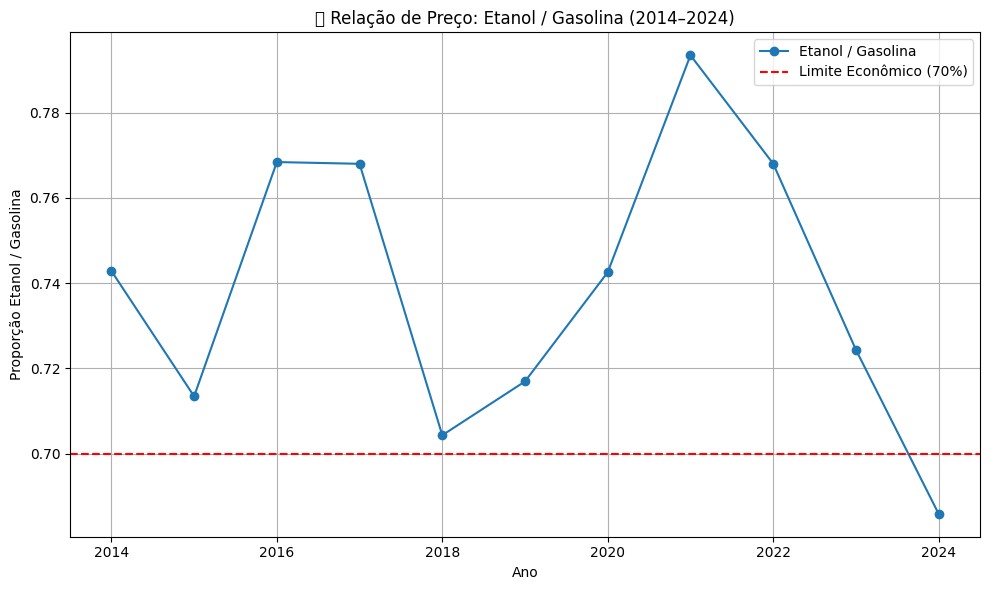

In [0]:
## 8. Relação Etanol / Gasolina ao Longo dos Anos

df_combustivel_etanol_gasolina = df_limpo[df_limpo["Produto"].isin(["GASOLINA", "ETANOL"])]

df_medias = df_combustivel_etanol_gasolina.groupby(["Ano", "Produto"])["Valor de Venda"].mean().unstack()

df_medias["Relação Etanol/Gasolina"] = df_medias["ETANOL"] / df_medias["GASOLINA"]

import matplotlib.pyplot as plt
# Se estiver abaixo de 0,70 o Etanol vale mais a pena

plt.figure(figsize=(10, 6))
plt.plot(df_medias.index, df_medias["Relação Etanol/Gasolina"], marker="o", label="Etanol / Gasolina")
plt.axhline(0.7, color='red', linestyle='--', label="Limite Econômico (70%)")
plt.title(" Relação de Preço: Etanol / Gasolina (2014–2024)")
plt.xlabel("Ano")
plt.ylabel("Proporção Etanol / Gasolina")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


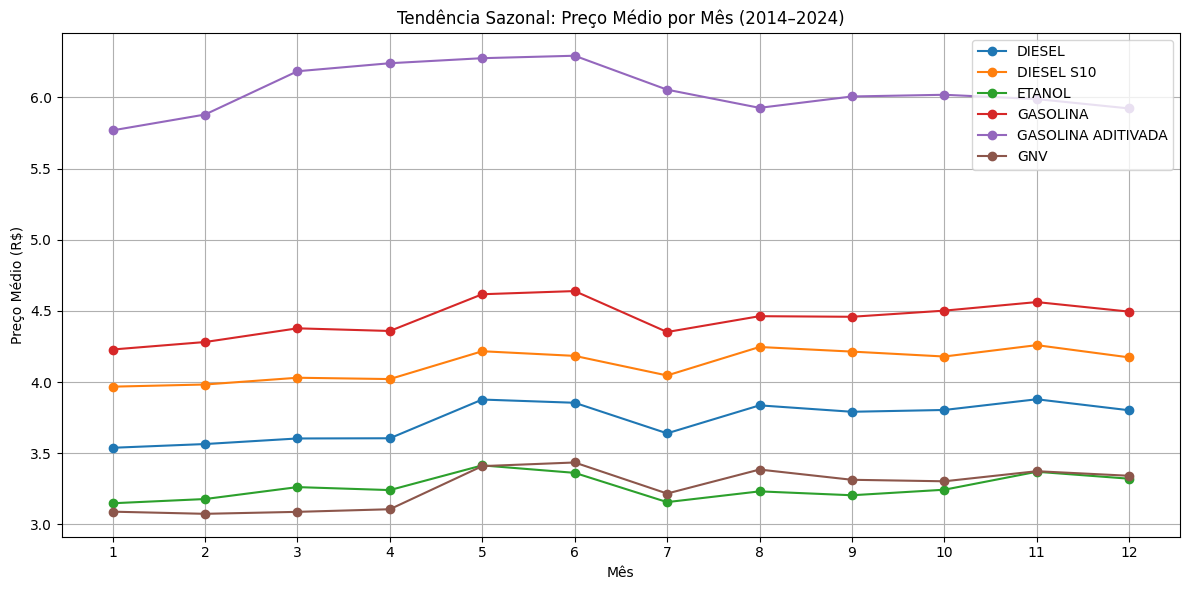

In [0]:
## 8. Tendência Sazonal


# Criar colunas de mês e semestre
df_limpo["Mês"] = df_limpo["Data da Coleta"].dt.month
df_limpo["Semestre"] = df_limpo["Mês"].apply(lambda x: 1 if x <= 6 else 2)

# Calcular média por mês e produto
df_mensal = df_limpo.groupby(["Mês", "Produto"])["Valor de Venda"].mean().reset_index()

# Plotar
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for produto in df_mensal["Produto"].unique():
    dados = df_mensal[df_mensal["Produto"] == produto]
    plt.plot(dados["Mês"], dados["Valor de Venda"], marker="o", label=produto)

plt.title("Tendência Sazonal: Preço Médio por Mês (2014–2024)")
plt.xlabel("Mês")
plt.ylabel("Preço Médio (R$)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [0]:
## 9. Efeito das Eleições

# Criar colunas de ano e mês
df_limpo["Ano"] = df_limpo["Data da Coleta"].dt.year
df_limpo["Mês"] = df_limpo["Data da Coleta"].dt.month

# Marcar anos eleitorais
anos_eleitorais = [2014, 2018, 2022]
df_limpo["Ano Eleitoral"] = df_limpo["Ano"].isin(anos_eleitorais)

# Filtrar de julho a novembro
df_eleicao_periodo = df_limpo[df_limpo["Mês"].between(7, 11)]

# Calcular média por ano, produto e se é eleitoral ou não
df_analise = df_eleicao_periodo.groupby(["Ano", "Ano Eleitoral", "Produto"])["Valor de Venda"].mean().reset_index()

# Calcular a média agrupada só por Produto e se é ano eleitoral ou não
df_comparacao = df_analise.groupby(["Produto", "Ano Eleitoral"])["Valor de Venda"].mean().reset_index()

# Pivotar a tabela para facilitar leitura
df_tendencia = df_comparacao.pivot(index="Produto", columns="Ano Eleitoral", values="Valor de Venda").reset_index()
df_tendencia.columns = ["Produto", "Preço em Anos Não-Eleitorais", "Preço em Anos Eleitorais"]
df_tendencia["Diferença"] = df_tendencia["Preço em Anos Eleitorais"] - df_tendencia["Preço em Anos Não-Eleitorais"]

# Arredondar
df_tendencia = df_tendencia.round(3)

# Visualizar
display(df_tendencia)


Produto,Preço em Anos Não-Eleitorais,Preço em Anos Eleitorais,Diferença
DIESEL,4.079,4.376,0.296
DIESEL S10,4.178,4.49,0.312
ETANOL,3.427,3.184,-0.243
GASOLINA,4.695,4.341,-0.355
GASOLINA ADITIVADA,5.768,5.579,-0.189
GNV,3.331,3.294,-0.038


In [0]:
## Análise dos Resultados

Todas as perguntas definidas no início do projeto foram possíveis de responder com os dados disponíveis. Algumas entregas ficaram dentro do esperado. Porém, reconheço que algumas perguntas tiveram representações que não ficaram tão boas quanto eu gostaria. Em certos casos, os gráficos ou tabelas não transmitiram o que eu imaginava, e isso deixou algumas análises com menos impacto do que eu esperava no início.

Apesar disso, o projeto conseguiu cumprir o objetivo geral, e as análises mostram um panorama coerente da evolução dos combustíveis no Brasil.
